In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/shriyog/Documents/SEM5/DW/C2P1/insurance_claims.csv'
data = pd.read_csv(file_path)

# Columns to drop based on analysis
columns_to_drop = [
    'policy_number', 'policy_bind_date', 'insured_zip', 'insured_hobbies', 
    'insured_occupation', 'incident_location', '_c39'
]

# Drop the unnecessary columns
data_cleaned = data.drop(columns=columns_to_drop)

# Replace "?" with NaN for missing data handling
data_cleaned = data_cleaned.replace('?', pd.NA)

# Save the cleaned dataset
cleaned_file_path = '/Users/shriyog/Documents/SEM5/DW/C2P1/cleaned_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

# Display information about the cleaned dataset
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_date                1000 non-null   object 
 13  incident_type      

In [2]:
pip install pandas mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 433.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

# Load the cleaned dataset
cleaned_file_path = '/Users/shriyog/Documents/SEM5/DW/C2P1/cleaned_dataset.csv'
data_cleaned = pd.read_csv(cleaned_file_path)

# Step 1: Rename columns with hyphens to match SQL table column names
data_cleaned.columns = data_cleaned.columns.str.replace('-', '_', regex=False)

# Step 2: Check if the number of columns match the SQL query placeholders
print("Columns in DataFrame:", data_cleaned.columns)
print("Number of columns:", len(data_cleaned.columns))

# Step 3: Handle null values by converting them to None (compatible with MySQL NULL)
data_cleaned = data_cleaned.where(pd.notnull(data_cleaned), None)

# Establish a MySQL connection
try:
    connection = mysql.connector.connect(
        host='localhost',        # Replace with your MySQL server host
        database='DW',           # Replace with your database name
        user='root',             # Replace with your MySQL username
        password='password'      # Replace with your MySQL password
    )
    
    if connection.is_connected():
        cursor = connection.cursor()
        print("Connected to MySQL database")

        # Step 4: Create table in MySQL if not exists
        create_table_query = '''
        CREATE TABLE IF NOT EXISTS insurance_claims (
            months_as_customer INT,
            age INT,
            policy_state VARCHAR(255),
            policy_csl VARCHAR(255),
            policy_deductable INT,
            policy_annual_premium FLOAT,
            umbrella_limit INT,
            insured_sex VARCHAR(10),
            insured_education_level VARCHAR(255),
            insured_relationship VARCHAR(255),
            capital_gains INT,
            capital_loss INT,
            incident_date DATE,
            incident_type VARCHAR(255),
            collision_type VARCHAR(255),
            incident_severity VARCHAR(255),
            authorities_contacted VARCHAR(255),
            incident_state VARCHAR(255),
            incident_city VARCHAR(255),
            incident_hour_of_the_day INT,
            number_of_vehicles_involved INT,
            property_damage VARCHAR(10),
            bodily_injuries INT,
            witnesses INT,
            police_report_available VARCHAR(10),
            total_claim_amount INT,
            injury_claim INT,
            property_claim INT,
            vehicle_claim INT,
            auto_make VARCHAR(255),
            auto_model VARCHAR(255),
            auto_year INT,
            fraud_reported VARCHAR(1)
        )
        '''
        cursor.execute(create_table_query)
        print("Table created successfully")

        # Step 5: Insert data into the table
        insert_query = '''
INSERT INTO insurance_claims (
    months_as_customer, age, policy_state, policy_csl, policy_deductable,
    policy_annual_premium, umbrella_limit, insured_sex, insured_education_level,
    insured_relationship, capital_gains, capital_loss, incident_date,
    incident_type, collision_type, incident_severity, authorities_contacted,
    incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved,
    property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount,
    injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)
'''
        
        for idx, row in data_cleaned.iterrows():
            try:
                cursor.execute(insert_query, tuple(row))
            except Error as insert_error:
                print(f"Error inserting row {idx}: {insert_error}")
                continue  # Continue with the next row

        # Commit the transaction after all rows are inserted
        connection.commit()
        print("Data loaded into MySQL successfully")

except Error as e:
    print(f"Error connecting to MySQL: {e}")
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection closed")


Columns in DataFrame: Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_relationship',
       'capital_gains', 'capital_loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')
Number of columns: 33
Connected to MySQL database
Table created successfully
Data loaded into MySQL successfully
MySQL connection closed


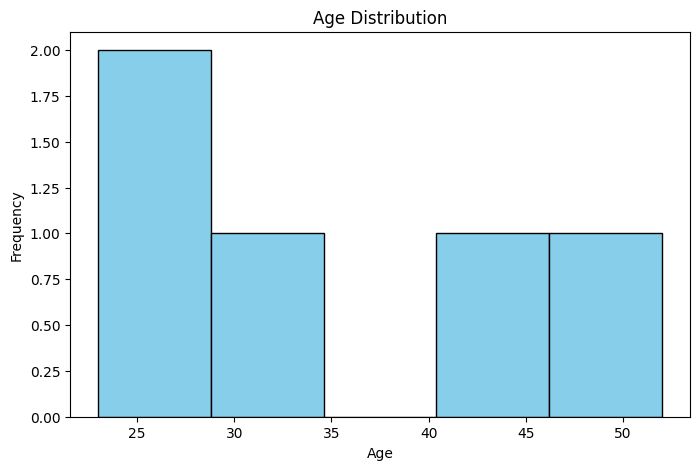

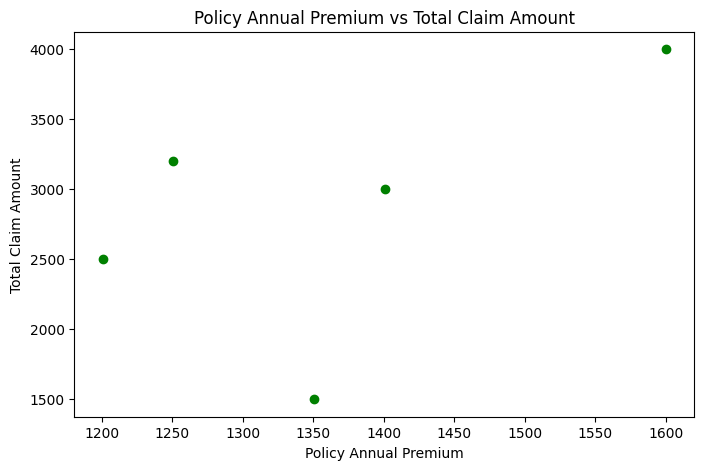

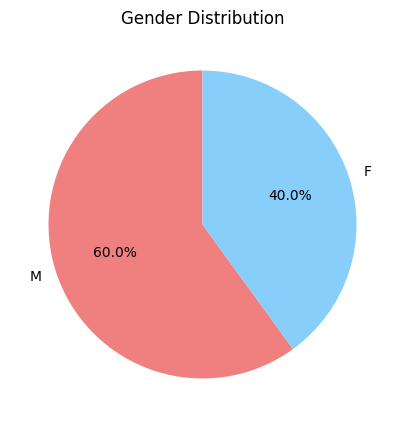

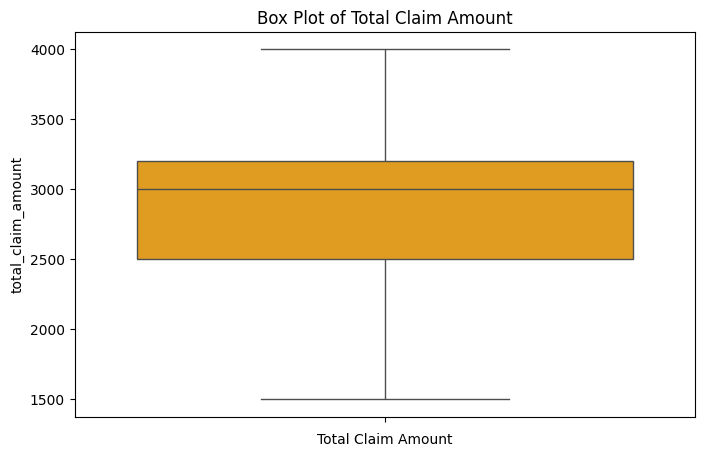

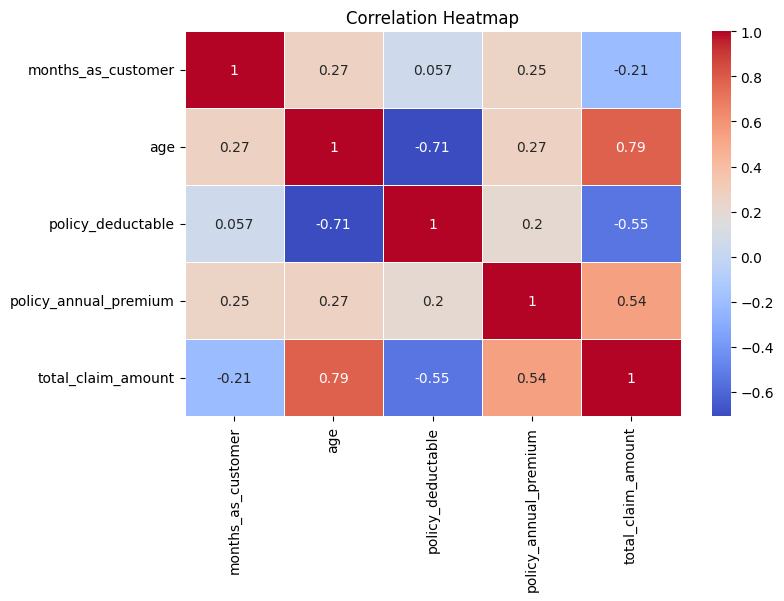

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame
data = {
    'months_as_customer': [12, 15, 20, 22, 25],
    'age': [25, 32, 45, 52, 23],
    'policy_state': ['NY', 'CA', 'TX', 'NY', 'TX'],
    'policy_csl': ['250/500', '500/1000', '250/500', '250/500', '500/1000'],
    'policy_deductable': [500, 1000, 500, 250, 1000],
    'policy_annual_premium': [1200.50, 1400.75, 1600.30, 1250.40, 1350.60],
    'total_claim_amount': [2500, 3000, 4000, 3200, 1500],
    'insured_sex': ['M', 'F', 'M', 'F', 'M'],
    'incident_severity': ['Major', 'Minor', 'Major', 'Minor', 'Major']
}

df = pd.DataFrame(data)

# Plot 1: Histogram for age distribution
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Scatter plot for policy annual premium vs total claim amount
plt.figure(figsize=(8, 5))
plt.scatter(df['policy_annual_premium'], df['total_claim_amount'], color='green')
plt.title('Policy Annual Premium vs Total Claim Amount')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Total Claim Amount')
plt.show()

# Plot 3: Pie chart for insured_sex distribution
plt.figure(figsize=(8, 5))
df['insured_sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Plot 4: Box plot for total claim amount
plt.figure(figsize=(8, 5))
sns.boxplot(df['total_claim_amount'], color='orange')
plt.title('Box Plot of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.show()

# Plot 5: Heatmap for correlation between numerical variables
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
